Waiter tip prediction

In [52]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

data = pd.read_csv("tips.csv")
print(data.head())

   total_bill  tip     sex  day    time  size
0         935   55  Female  Sun  Dinner     2
1         540   15    Male  Sun  Dinner     3
2        1070   55    Male  Sun  Dinner     3
3         535   10    Male  Sun  Dinner     2
4         200   15  Female  Sun  Dinner     4


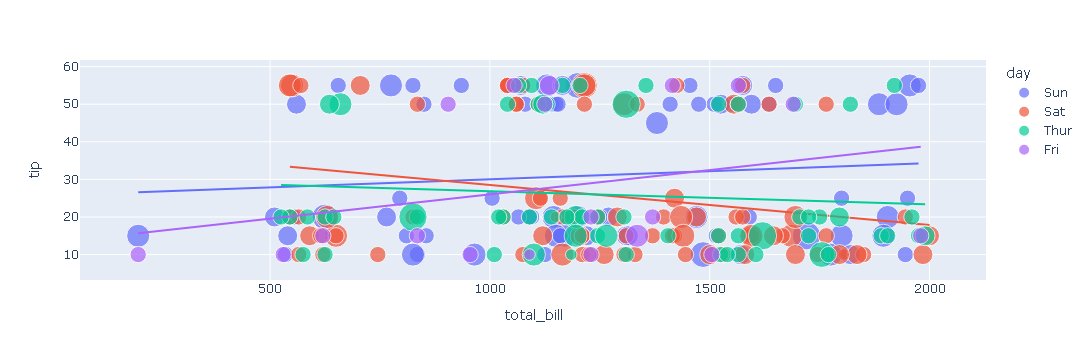

In [53]:
figure = px.scatter(data_frame = data, x="total_bill",
                    y="tip", size="size", color= "day", trendline="ols")
figure.show()

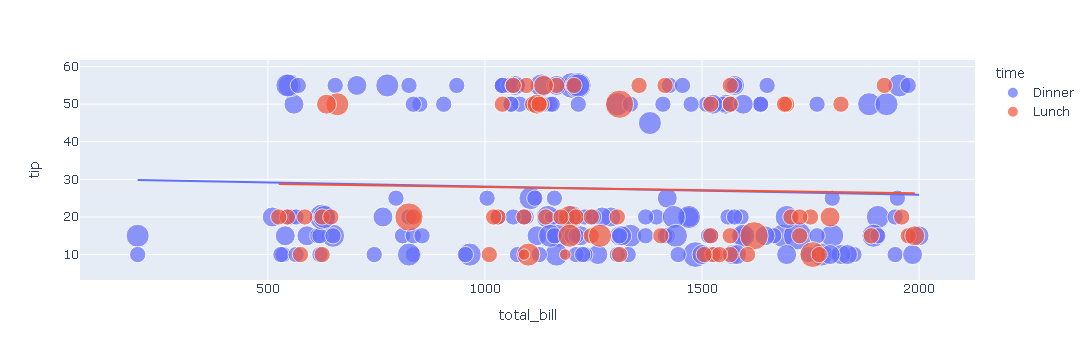

In [54]:
figure = px.scatter(data_frame = data, x="total_bill",
                    y="tip", size="size", color= "time", trendline="ols")
figure.show()

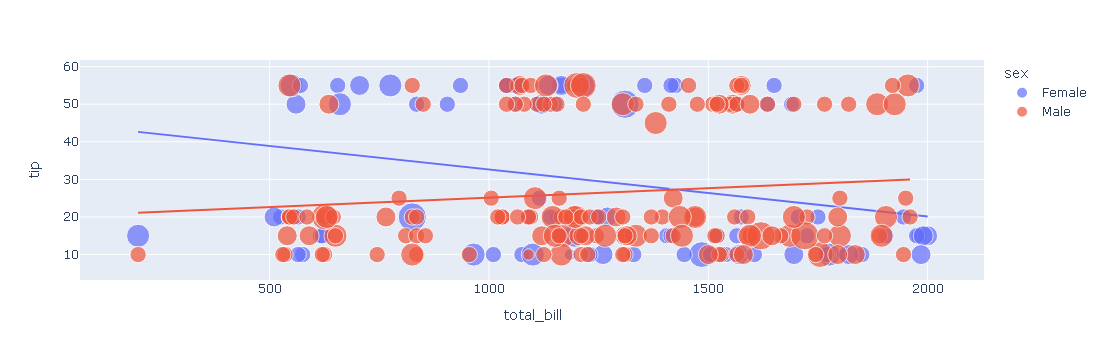

In [55]:
figure = px.scatter(data_frame = data, x="total_bill",
                    y="tip", size="size", color= "sex", trendline="ols")
figure.show()

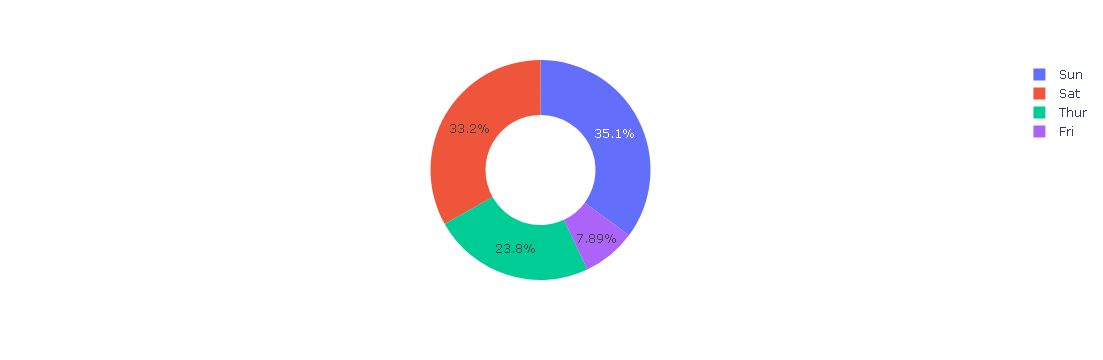

In [56]:
figure = px.pie(data, 
             values='tip', 
             names='day',hole = 0.5)
figure.show()

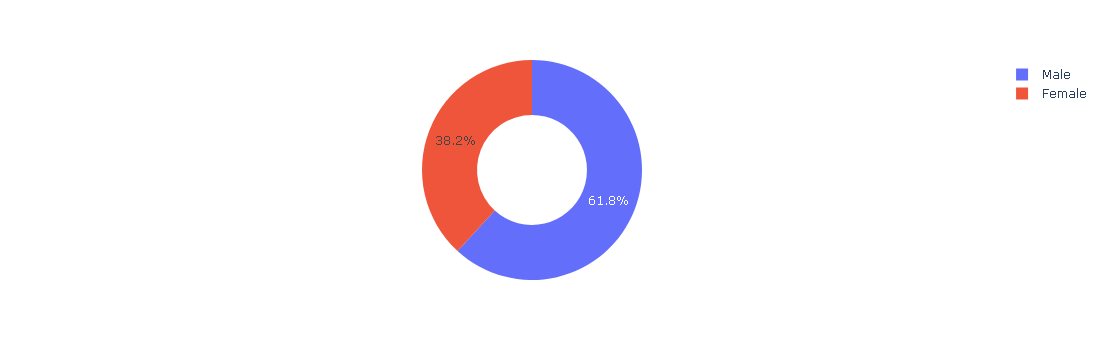

In [57]:
figure = px.pie(data, 
             values='tip', 
             names='sex',hole = 0.5)
figure.show()

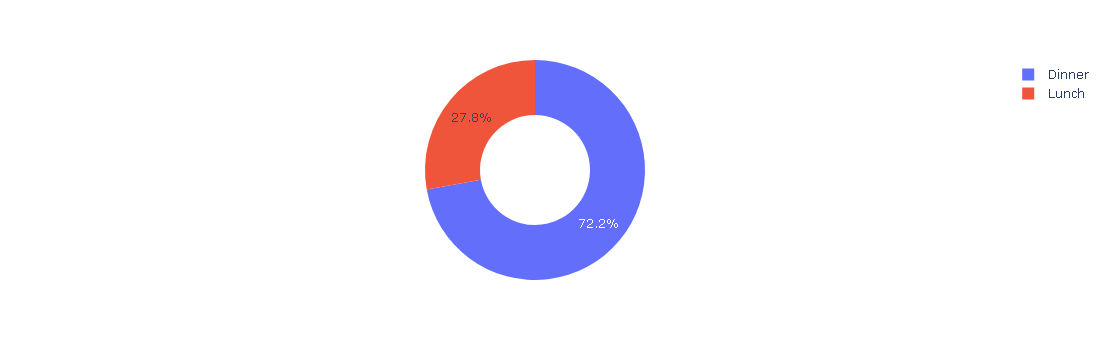

In [58]:
figure = px.pie(data, 
             values='tip', 
             names='time',hole = 0.5)
figure.show()

Waiter tip prediction model

In [59]:
data["sex"] = data["sex"].map({"Female": 0, "Male": 1})
data["day"] = data["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})
data["time"] = data["time"].map({"Lunch": 0, "Dinner": 1})
data.head()

,total_bill,tip,sex,day,time,size
0,935,55,0,3,1,2
1,540,15,1,3,1,3
2,1070,55,1,3,1,3
3,535,10,1,3,1,2
4,200,15,0,3,1,4


In [60]:
x = np.array(data[["total_bill", "sex", "day", 
                   "time", "size"]])
y = np.array(data["tip"])

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

In [61]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [62]:
# features = [[total_bill, "sex",  "day", "time", "size"]]
features = np.array([[400, 0, 0, 1, 1]])
model.predict(features)

array([14.39996975])